In [1]:
# ==============================================================================
# CELL 1: LOAD PREPARED DATASETS
# ==============================================================================
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load all the arrays from the .npz file
data = np.load('normalized_split_data.npz')

# Assign them to the correct variables
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

print("--- Data Loaded Successfully ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"X_test shape:  {X_test.shape}")

--- Data Loaded Successfully ---
X_train shape: (313480, 50, 3)
X_val shape:   (188088, 50, 3)
X_test shape:  (125393, 50, 3)


In [2]:
# ==============================================================================
# CELL 1: BUILD THE CNN MODEL WITH LEAKY RELU
# ==============================================================================
import tensorflow as tf
from tensorflow.keras import layers, models

def build_leaky_relu_cnn(input_shape):
    inp = layers.Input(shape=input_shape)

    # Block 1
    x = layers.Conv1D(128, kernel_size=5, padding="same", activation="leaky_relu")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, kernel_size=5, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Block 2
    x = layers.Conv1D(256, kernel_size=3, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(256, kernel_size=3, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # Dense Layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation="leaky_relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="leaky_relu")(x)
    x = layers.Dropout(0.2)(x)

    # Output
    out = layers.Dense(1, activation="linear")(x)

    model = models.Model(inp, out)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=["mae"]
    )
    return model

# This assumes X_train is already created and normalized
input_shape = (X_train.shape[1], X_train.shape[2])
model_leaky = build_leaky_relu_cnn(input_shape)

print("--- CNN Model with Leaky ReLU Built Successfully ---")
model_leaky.summary()

--- CNN Model with Leaky ReLU Built Successfully ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 50, 128)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 25, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,305 (4.59 MB)

 Trainable params: 1,200,769 (4.58 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [3]:
# ==============================================================================
# CELL 2: TRAIN THE LEAKY RELU CNN MODEL
# ==============================================================================
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("\n--- Starting Leaky ReLU CNN Model Training ---")

# Define the training callbacks
early_stopping = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history_leaky = model_leaky.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Save the trained model
model_leaky.save('soc_cnn_leaky_relu_model.keras')
print("\n--- Model training complete and model saved as 'soc_cnn_leaky_relu_model.keras' ---")

# Final evaluation on the test set
test_loss, test_mae = model_leaky.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Set Performance (Leaky ReLU Model):")
print(f" -> Mean Squared Error (MSE): {test_loss:.4f}")
print(f" -> Mean Absolute Error (MAE): {test_mae:.4f}  (or {test_mae*100:.2f}%)")


--- Starting Leaky ReLU CNN Model Training ---
Epoch 1/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 187s 151ms/step - loss: 0.1075 - mae: 0.1377 - val_loss: 0.0065 - val_mae: 0.0605 - learning_rate: 0.0010
Epoch 2/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 182s 148ms/step - loss: 0.0101 - mae: 0.0772 - val_loss: 0.0083 - val_mae: 0.0716 - learning_rate: 0.0010
Epoch 3/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 163s 133ms/step - loss: 0.0084 - mae: 0.0704 - val_loss: 0.0056 - val_mae: 0.0581 - learning_rate: 0.0010
Epoch 4/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 146s 119ms/step - loss: 0.0077 - mae: 0.0671 - val_loss: 0.0045 - val_mae: 0.0476 - learning_rate: 0.0010
Epoch 5/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 144s 118ms/step - loss: 0.0067 - mae: 0.0622 - val_loss: 0.0042 - val_mae: 0.0487 - learning_rate: 0.0010
Epoch 6/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 150s 122ms/step - loss: 0.0052 - mae: 0.0542 - val_loss: 0.0034 - val_mae: 0.0412 - learning_rate: 0.0010
Epoch 7/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 151s 123ms/step


--- Visualizing Learning Curves for Leaky ReLU CNN Model ---


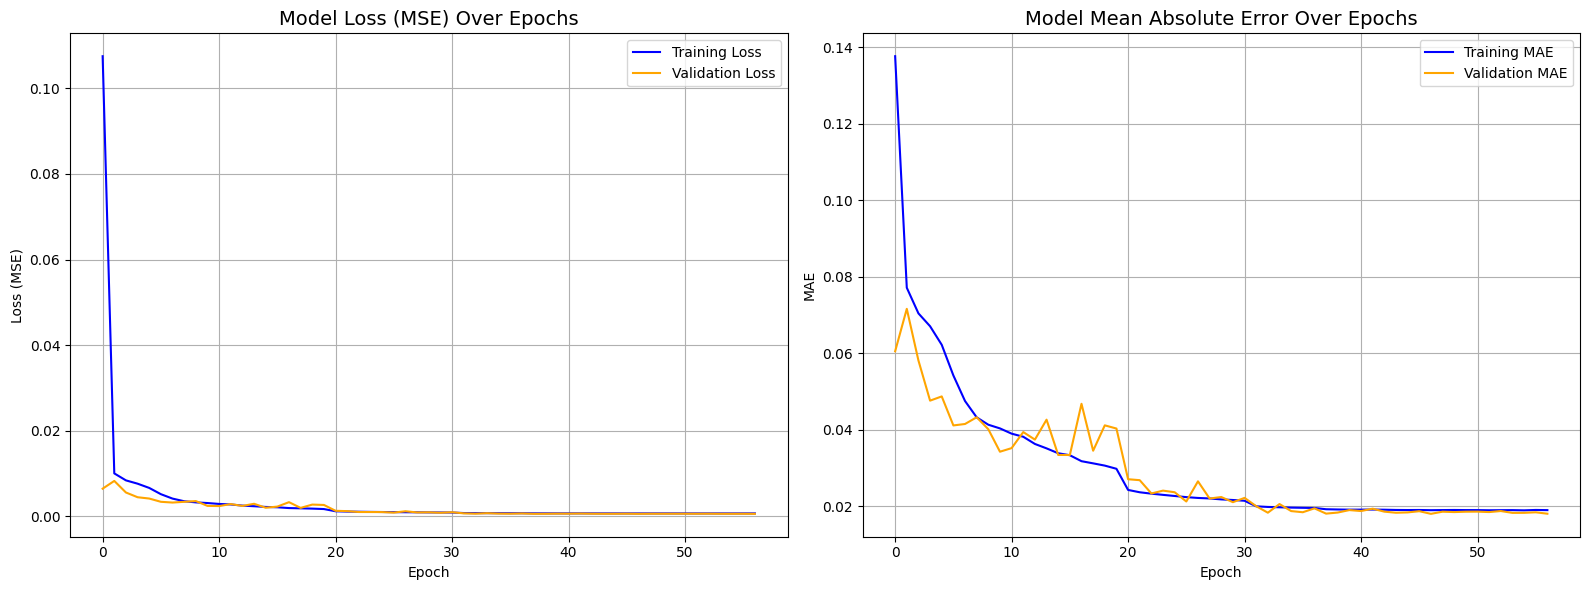

In [8]:
import matplotlib.pyplot as plt

# ==============================================================================
# VISUALIZE LEARNING CURVES FOR THE LEAKY RELU MODEL
# ==============================================================================

# This assumes 'history_leaky' is the variable holding the history from your model.fit() call

print("\n--- Visualizing Learning Curves for Leaky ReLU CNN Model ---")

plt.figure(figsize=(16, 6))

# Plot 1: Model Loss (MSE) over Epochs
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_leaky.history['loss'], label='Training Loss', color='blue')
plt.plot(history_leaky.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss (MSE) Over Epochs', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot 2: Model Mean Absolute Error (MAE) over Epochs
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_leaky.history['mae'], label='Training MAE', color='blue')
plt.plot(history_leaky.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Model Mean Absolute Error Over Epochs', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

--- Loading saved model... ---
--- Loading test data... ---
-> Model and data loaded successfully.
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step

--- Generating Plots ---


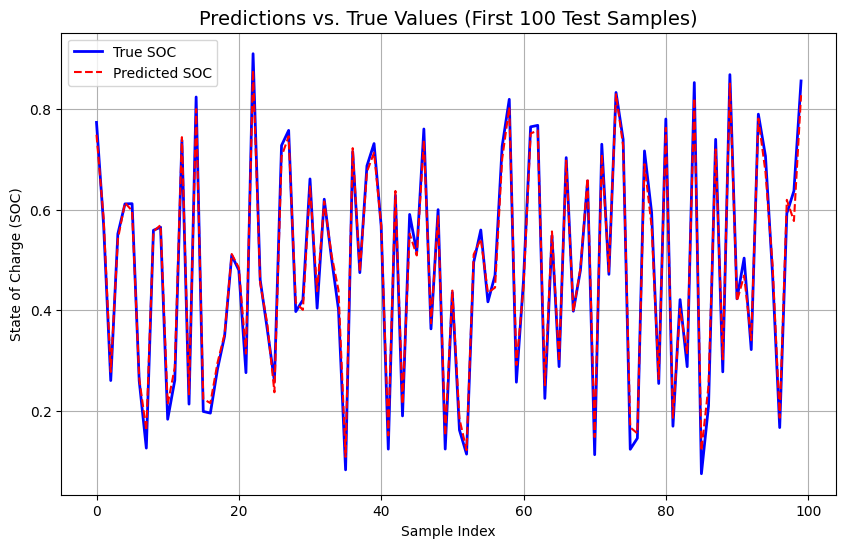


--- Final Model Performance Metrics on Test Set ---
Mean Absolute Error (MAE):      0.0180  (or 1.80%)
Root Mean Squared Error (RMSE): 0.0247
R-squared (R²) Score:         0.9881
Correlation Coefficient (Corr): 0.9961


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ==============================================================================
# STEP 1: LOAD THE SAVED MODEL AND TEST DATA
# ==============================================================================

# Load the trained model from the file
print("--- Loading saved model... ---")
model = load_model('soc_cnn_leaky_relu_model.keras')

# Load the test data from the .npz file
print("--- Loading test data... ---")
data = np.load('normalized_split_data.npz')
X_test = data['X_test']
y_test = data['y_test']

print("-> Model and data loaded successfully.")


# ==============================================================================
# STEP 2: MAKE PREDICTIONS AND VISUALIZE RESULTS
# ==============================================================================

# Generate predictions on the test set
y_pred = model.predict(X_test)

# --- Create the Predictions vs. True Values Plot (100 Samples) ---
print("\n--- Generating Plots ---")
plt.figure(figsize=(10, 6))
plt.plot(y_test[:20], label='True SOC', color='blue', linewidth=2)
plt.plot(y_pred[:20], label='Predicted SOC', color='red', linestyle='--')
plt.title('Predictions vs. True Values (First 100 Test Samples)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('State of Charge (SOC)')
plt.legend()
plt.grid(True)
plt.show()


# ==============================================================================
# STEP 3: CALCULATE AND DISPLAY PERFORMANCE METRICS
# ==============================================================================

# Calculate all the metrics
mae = np.mean(np.abs(y_test - y_pred.flatten()))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred.flatten())
correlation = correlation_matrix[0, 1]

# Print the results
print("\n--- Final Model Performance Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE):      {mae:.4f}  (or {mae*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score:         {r2:.4f}")
print(f"Correlation Coefficient (Corr): {correlation:.4f}")

--- Loading saved model... ---
--- Loading test data... ---
-> Model and data loaded successfully.
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step

--- Generating Plots ---


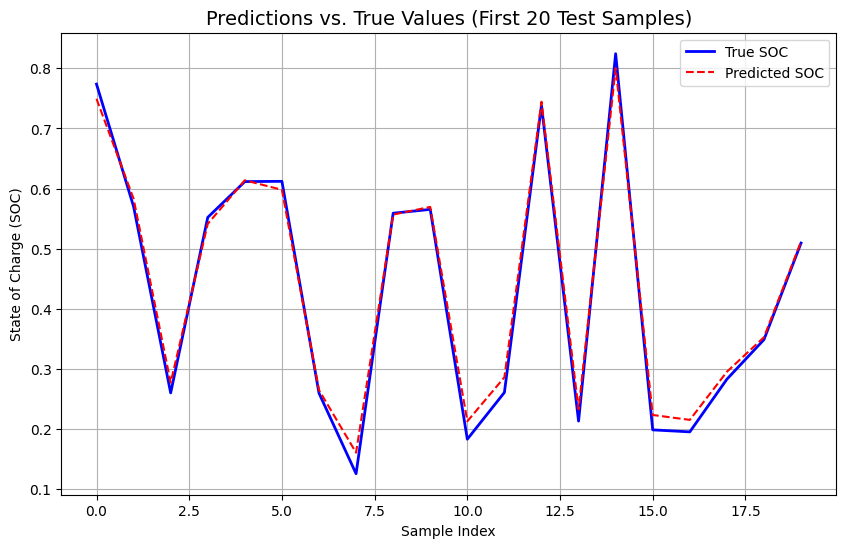


--- Final Model Performance Metrics on Test Set ---
Mean Absolute Error (MAE):      0.0180  (or 1.80%)
Root Mean Squared Error (RMSE): 0.0247
R-squared (R²) Score:         0.9881
Correlation Coefficient (Corr): 0.9961


In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ==============================================================================
# STEP 1: LOAD THE SAVED MODEL AND TEST DATA
# ==============================================================================

# Load the trained model from the file
print("--- Loading saved model... ---")
model = load_model('soc_cnn_leaky_relu_model.keras')

# Load the test data from the .npz file
print("--- Loading test data... ---")
data = np.load('normalized_split_data.npz')
X_test = data['X_test']
y_test = data['y_test']

print("-> Model and data loaded successfully.")


# ==============================================================================
# STEP 2: MAKE PREDICTIONS AND VISUALIZE RESULTS
# ==============================================================================

# Generate predictions on the test set
y_pred = model.predict(X_test)

# --- Create the Predictions vs. True Values Plot (100 Samples) ---
print("\n--- Generating Plots ---")
plt.figure(figsize=(10, 6))
plt.plot(y_test[:20], label='True SOC', color='blue', linewidth=2)
plt.plot(y_pred[:20], label='Predicted SOC', color='red', linestyle='--')
plt.title('Predictions vs. True Values (First 20 Test Samples)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('State of Charge (SOC)')
plt.legend()
plt.grid(True)
plt.show()


# ==============================================================================
# STEP 3: CALCULATE AND DISPLAY PERFORMANCE METRICS
# ==============================================================================

# Calculate all the metrics
mae = np.mean(np.abs(y_test - y_pred.flatten()))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred.flatten())
correlation = correlation_matrix[0, 1]

# Print the results
print("\n--- Final Model Performance Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE):      {mae:.4f}  (or {mae*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score:         {r2:.4f}")
print(f"Correlation Coefficient (Corr): {correlation:.4f}")

In [9]:
# ==============================================================================
# CELL 1: BUILD THE LEAKY RELU CNN-BiLSTM FUSION MODEL
# ==============================================================================
import tensorflow as tf
from tensorflow.keras import layers, models

def build_leaky_cnn_bilstm_model(input_shape):
    inp = layers.Input(shape=input_shape)

    # --- Part 1: CNN Feature Extractor (with Leaky ReLU) ---
    x = layers.Conv1D(128, kernel_size=5, padding="same", activation="leaky_relu")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(128, kernel_size=5, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    x = layers.Conv1D(256, kernel_size=3, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(256, kernel_size=3, padding="same", activation="leaky_relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    # --- Part 2: BiLSTM Context Expert (The NEW Part) ---
    x = layers.Bidirectional(layers.LSTM(units=100, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(units=80))(x)

    # --- Part 3: Decision-Making Head (with Leaky ReLU) ---
    x = layers.Dense(256, activation="leaky_relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(128, activation="leaky_relu")(x)
    x = layers.Dropout(0.2)(x)
    out = layers.Dense(1, activation="linear")(x)

    model = models.Model(inp, out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="mse", metrics=["mae"])
    return model

# This assumes X_train is already created and normalized
input_shape = (X_train.shape[1], X_train.shape[2])
model_leaky_hybrid = build_leaky_cnn_bilstm_model(input_shape)

print("--- Leaky ReLU CNN-BiLSTM Fusion Model Built Successfully ---")
model_leaky_hybrid.summary()

--- Leaky ReLU CNN-BiLSTM Fusion Model Built Successfully ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 50, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 50, 128)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 25, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 25, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 25, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 12, 200)        │       285,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 160)            │       179,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 922,273 (3.52 MB)

 Trainable params: 920,737 (3.51 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [10]:
# ==============================================================================
# CELL 2: TRAIN THE LEAKY RELU CNN-BiLSTM MODEL
# ==============================================================================
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("\n--- Starting Leaky ReLU CNN-BiLSTM Model Training ---")

# Define the training callbacks
early_stopping = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history_leaky_hybrid = model_leaky_hybrid.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

# Save the trained model
model_leaky_hybrid.save('soc_leaky_cnn_bilstm_model.keras')
print("\n--- Model training complete and model saved as 'soc_leaky_cnn_bilstm_model.keras' ---")

# Final evaluation on the test set
test_loss, test_mae = model_leaky_hybrid.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Set Performance (Leaky ReLU Fusion Model):")
print(f" -> Mean Squared Error (MSE): {test_loss:.5f}")
print(f" -> Mean Absolute Error (MAE): {test_mae:.5f}  (or {test_mae*100:.3f}%)")


--- Starting Leaky ReLU CNN-BiLSTM Model Training ---
Epoch 1/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 292s 231ms/step - loss: 0.0075 - mae: 0.0622 - val_loss: 0.0053 - val_mae: 0.0543 - learning_rate: 0.0010
Epoch 2/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 252s 206ms/step - loss: 0.0042 - mae: 0.0475 - val_loss: 0.0039 - val_mae: 0.0452 - learning_rate: 0.0010
Epoch 3/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 246s 201ms/step - loss: 0.0033 - mae: 0.0414 - val_loss: 0.0037 - val_mae: 0.0410 - learning_rate: 0.0010
Epoch 4/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 247s 201ms/step - loss: 0.0028 - mae: 0.0374 - val_loss: 0.0026 - val_mae: 0.0358 - learning_rate: 0.0010
Epoch 5/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 249s 204ms/step - loss: 0.0024 - mae: 0.0339 - val_loss: 0.0029 - val_mae: 0.0349 - learning_rate: 0.0010
Epoch 6/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 251s 205ms/step - loss: 0.0020 - mae: 0.0316 - val_loss: 0.0024 - val_mae: 0.0360 - learning_rate: 0.0010
Epoch 7/100
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 231s 188


--- Visualizing Learning Curves for Leaky ReLU CNN-BiLSTM Model ---


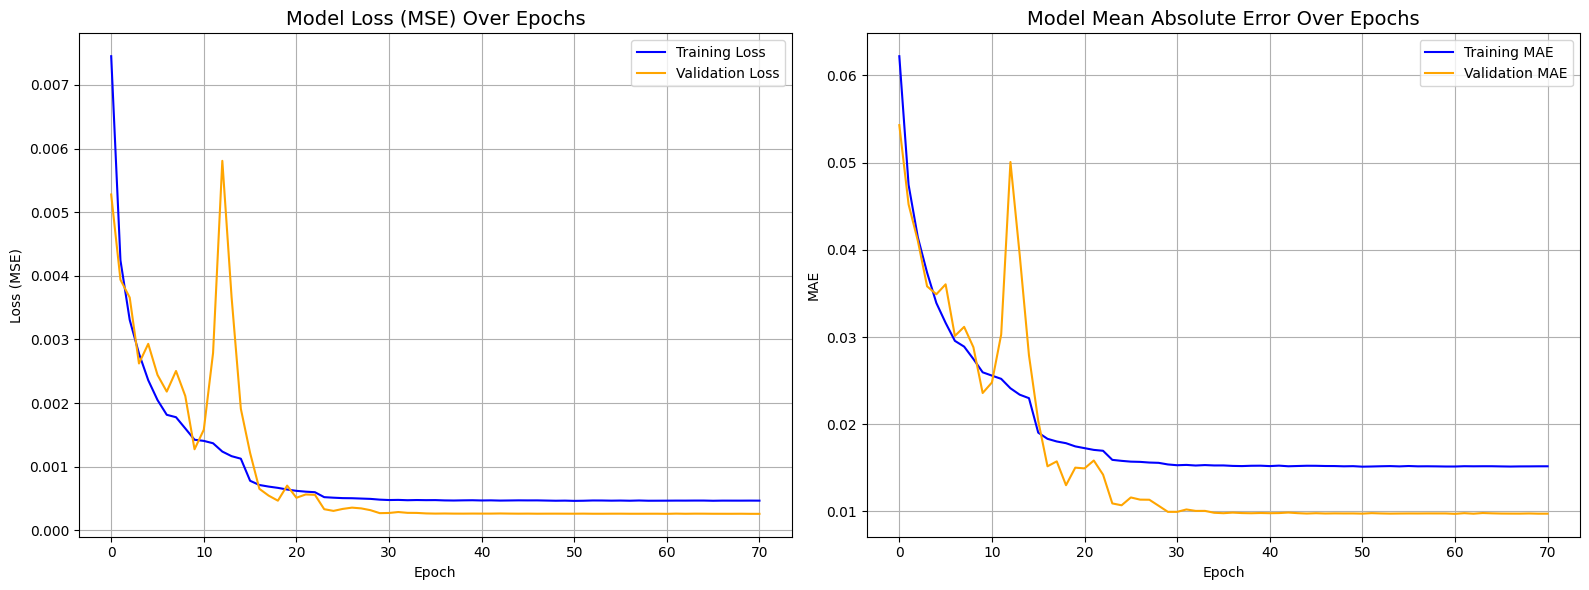

In [11]:
import matplotlib.pyplot as plt

# ==============================================================================
# VISUALIZE LEARNING CURVES FOR THE LEAKY RELU MODEL
# ==============================================================================

# This assumes 'history_leaky' is the variable holding the history from your model.fit() call

print("\n--- Visualizing Learning Curves for Leaky ReLU CNN-BiLSTM Model ---")

plt.figure(figsize=(16, 6))

# Plot 1: Model Loss (MSE) over Epochs
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_leaky_hybrid.history['loss'], label='Training Loss', color='blue')
plt.plot(history_leaky_hybrid.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss (MSE) Over Epochs', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# Plot 2: Model Mean Absolute Error (MAE) over Epochs
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_leaky_hybrid.history['mae'], label='Training MAE', color='blue')
plt.plot(history_leaky_hybrid.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Model Mean Absolute Error Over Epochs', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

--- Loading saved model... ---
--- Loading test data... ---
-> Model and data loaded successfully.
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step

--- Generating Plots ---


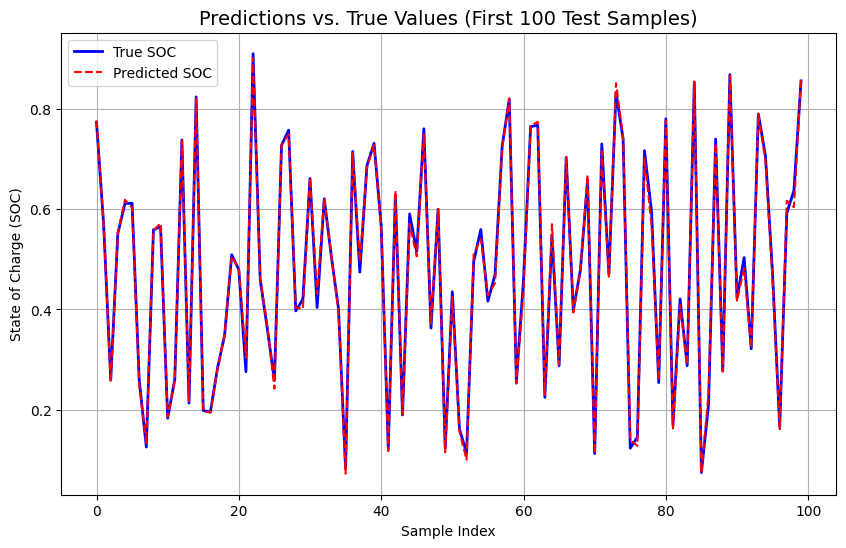


--- Final Model Performance Metrics on Test Set ---
Mean Absolute Error (MAE):      0.0097  (or 0.97%)
Root Mean Squared Error (RMSE): 0.0161
R-squared (R²) Score:         0.9950
Correlation Coefficient (Corr): 0.9975


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ==============================================================================
# STEP 1: LOAD THE SAVED MODEL AND TEST DATA
# ==============================================================================

# Load the trained model from the file
print("--- Loading saved model... ---")
model = load_model('soc_leaky_cnn_bilstm_model.keras')

# Load the test data from the .npz file
print("--- Loading test data... ---")
data = np.load('normalized_split_data.npz')
X_test = data['X_test']
y_test = data['y_test']

print("-> Model and data loaded successfully.")


# ==============================================================================
# STEP 2: MAKE PREDICTIONS AND VISUALIZE RESULTS
# ==============================================================================

# Generate predictions on the test set
y_pred = model.predict(X_test)

# --- Create the Predictions vs. True Values Plot (100 Samples) ---
print("\n--- Generating Plots ---")
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='True SOC', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='Predicted SOC', color='red', linestyle='--')
plt.title('Predictions vs. True Values (First 100 Test Samples)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('State of Charge (SOC)')
plt.legend()
plt.grid(True)
plt.show()


# ==============================================================================
# STEP 3: CALCULATE AND DISPLAY PERFORMANCE METRICS
# ==============================================================================

# Calculate all the metrics
mae = np.mean(np.abs(y_test - y_pred.flatten()))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred.flatten())
correlation = correlation_matrix[0, 1]

# Print the results
print("\n--- Final Model Performance Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE):      {mae:.4f}  (or {mae*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score:         {r2:.4f}")
print(f"Correlation Coefficient (Corr): {correlation:.4f}")

--- Loading saved model... ---
--- Loading test data... ---
-> Model and data loaded successfully.
3919/3919 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step

--- Generating Plots ---


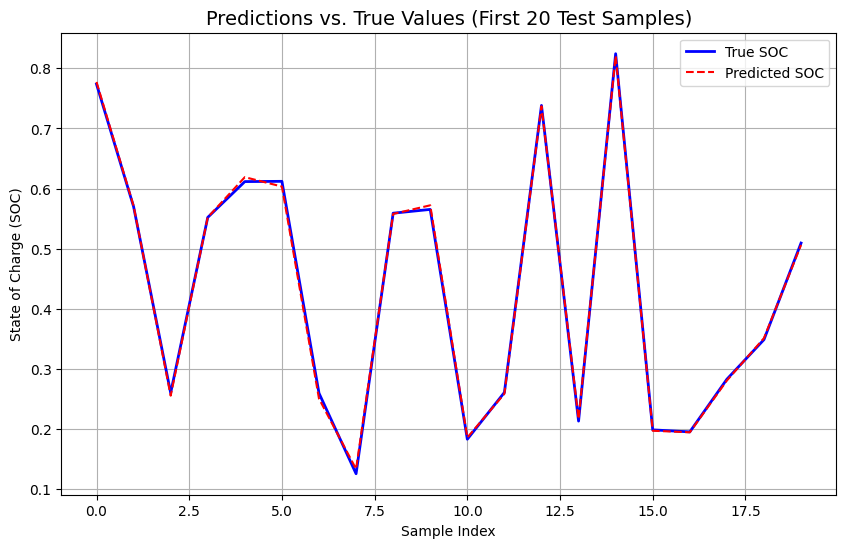


--- Final Model Performance Metrics on Test Set ---
Mean Absolute Error (MAE):      0.0097  (or 0.97%)
Root Mean Squared Error (RMSE): 0.0161
R-squared (R²) Score:         0.9950
Correlation Coefficient (Corr): 0.9975


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ==============================================================================
# STEP 1: LOAD THE SAVED MODEL AND TEST DATA
# ==============================================================================

# Load the trained model from the file
print("--- Loading saved model... ---")
model = load_model('soc_leaky_cnn_bilstm_model.keras')

# Load the test data from the .npz file
print("--- Loading test data... ---")
data = np.load('normalized_split_data.npz')
X_test = data['X_test']
y_test = data['y_test']

print("-> Model and data loaded successfully.")


# ==============================================================================
# STEP 2: MAKE PREDICTIONS AND VISUALIZE RESULTS
# ==============================================================================

# Generate predictions on the test set
y_pred = model.predict(X_test)

# --- Create the Predictions vs. True Values Plot (100 Samples) ---
print("\n--- Generating Plots ---")
plt.figure(figsize=(10, 6))
plt.plot(y_test[:20], label='True SOC', color='blue', linewidth=2)
plt.plot(y_pred[:20], label='Predicted SOC', color='red', linestyle='--')
plt.title('Predictions vs. True Values (First 20 Test Samples)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('State of Charge (SOC)')
plt.legend()
plt.grid(True)
plt.show()


# ==============================================================================
# STEP 3: CALCULATE AND DISPLAY PERFORMANCE METRICS
# ==============================================================================

# Calculate all the metrics
mae = np.mean(np.abs(y_test - y_pred.flatten()))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred.flatten())
correlation = correlation_matrix[0, 1]

# Print the results
print("\n--- Final Model Performance Metrics on Test Set ---")
print(f"Mean Absolute Error (MAE):      {mae:.4f}  (or {mae*100:.2f}%)")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score:         {r2:.4f}")
print(f"Correlation Coefficient (Corr): {correlation:.4f}")

In [3]:
# ==============================================================================
# COMPLETE SCRIPT: LOAD, PROCESS, AND SAVE SCALER
# ==============================================================================
import scipy.io
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- ACTION REQUIRED: Set your data path here ---
data_path = r"C:\Users\navat\OneDrive\Desktop\New Project" 

# --- Parameters ---
battery_names = [
    'B0005', 'B0006', 'B0007', 'B0018', 'B0025', 'B0026', 'B0027', 'B0028',
    'B0029', 'B0030', 'B0031', 'B0032', 'B0033', 'B0034', 'B0036', 'B0038',
    'B0039', 'B0040', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046',
    'B0047', 'B0048', 'B0049', 'B0050', 'B0051', 'B0052', 'B0053', 'B0054',
    'B0055', 'B0056'
]
NOMINAL_CAPACITY = 2.0

# --- Step 1: Define Helper Functions ---
def extract_all_discharge_cycles(file_path):
    mat = scipy.io.loadmat(file_path)
    battery_name = os.path.basename(file_path).split('.')[0]
    all_cycles = mat[battery_name][0, 0]['cycle'][0]
    discharge_cycles = []
    for cycle in all_cycles:
        if cycle['type'][0] == 'discharge':
            cycle_data = cycle['data'][0, 0]
            discharge_cycles.append(cycle_data)
    return discharge_cycles

def calculate_soc(cycle_data, capacity):
    current = cycle_data['Current_measured'].flatten()
    time = cycle_data['Time'].flatten()
    dt = np.diff(time, prepend=0)
    charge_drawn = np.cumsum(np.abs(current) * dt) / 3600
    soc = 1.0 - (charge_drawn / capacity)
    return np.clip(soc, 0.0, 1.0)

# --- Step 2: Load and Clean Raw Data to create 'all_processed_data' ---
print("--- Loading and cleaning raw battery data... ---")
all_processed_data = []
for name in battery_names:
    file_path = os.path.join(data_path, f"{name}.mat")
    if os.path.exists(file_path):
        cycles = extract_all_discharge_cycles(file_path)
        for i, cycle_data in enumerate(cycles):
            if np.mean(np.abs(cycle_data['Current_measured'])) < 0.1:
                continue
            soc = calculate_soc(cycle_data, NOMINAL_CAPACITY)
            processed_cycle = {
                'battery': name, 'cycle_number': i,
                'voltage': cycle_data['Voltage_measured'].flatten(),
                'current': cycle_data['Current_measured'].flatten(),
                'temperature': cycle_data['Temperature_measured'].flatten(),
                'soc': soc, 'time': cycle_data['Time'].flatten()
            }
            all_processed_data.append(processed_cycle)
print(f"-> Found and processed {len(all_processed_data)} valid discharge cycles.")

# --- Step 3: Create Data Windows ---
print("--- Creating data windows... ---")
WINDOW_SIZE = 50
X_list = []
for cycle in all_processed_data:
    features = np.stack([cycle['voltage'], cycle['current'], cycle['temperature']], axis=1)
    for i in range(len(features) - WINDOW_SIZE + 1):
        X_list.append(features[i:i + WINDOW_SIZE])
X = np.array(X_list)

# --- Step 4: Split Data to get X_train ---
print("--- Splitting data... ---")
X_train, _, _, _ = train_test_split(X, np.zeros(len(X)), test_size=0.5, random_state=42)

# --- Step 5: Create, Fit, and Save the Scaler ---
print("--- Fitting scaler and saving to file... ---")
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
scaler.fit(X_train_reshaped)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n-> Success! Scaler object has been created and saved to 'scaler.pkl'.")

--- Loading and cleaning raw battery data... ---
-> Found and processed 2768 valid discharge cycles.
--- Creating data windows... ---
--- Splitting data... ---
--- Fitting scaler and saving to file... ---

-> Success! Scaler object has been created and saved to 'scaler.pkl'.
